In [73]:
# Import required libraries
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time
import datetime

# Latency graphing
We are going to focus first on mean latency because that is something that we can measure at the database.


In [74]:
def setup_chart():
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(6, 9))
    fig.suptitle('Database Activity Monitoring')

    ax1.set_title('Latency')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Total Latency')

    ax2.set_title('Throughput')
    ax2.set_xlabel('Time')
    ax2.set_ylabel('Total Queries')

    ax2.set_title('Vacuum')
    ax2.set_xlabel('Time')
    ax2.set_ylabel('Vacuum processes')

    # Initialize lists to store data
    timestamps = []
    total_latencies = []
    total_queries_list = []
    vacuum_processes_list = []

    return fig, ax1, ax2, ax3, timestamps, total_latencies, total_queries_list, vacuum_processes_list

def update_chart(ax1, ax2, ax3, timestamps, avg_latencies_list, total_queries_list, vacuum_processes_list, current_time, latency, transaction_rate, vacuum_processes):
    # Append new data
    timestamps.append(current_time)
    avg_latencies_list.append(latency)
    total_queries_list.append(transaction_rate)
    vacuum_processes_list.append(vacuum_processes)
    
    # Clear the previous lines
    ax1.cla()
    ax2.cla()
    ax3.cla()
    
    # Redraw the subplots with new data
    ax1.plot(timestamps, avg_latencies_list, 'bo-')
    ax1.set_title('Latency')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Average Latency')
    
    ax2.plot(timestamps, total_queries_list, 'ro-')
    ax2.set_title('Throughput')
    ax2.set_xlabel('Time')
    ax2.set_ylabel('Query Rate')

    ax3.plot(timestamps, vacuum_processes_list, 'go-')
    ax3.set_title('Vacuum Activity')
    ax3.set_xlabel('Time')
    ax3.set_ylabel('Vacuum Processes')

    # Rescale the axes
    ax1.relim()
    ax1.autoscale_view()
    
    ax2.relim()
    ax2.autoscale_view()

    ax3.relim()
    ax3.autoscale_view()

    # print('Redrawing chart')
    # print(f"Number of points: {len(timestamps)}")
    # print(f"Number of points: {timestamps} {avg_latencies_list}")
    # plt.draw()
    fig.canvas.draw()
    hfig.update(fig)


# fig, ax1, ax2, timestamps, total_latencies, total_queries_list = setup_chart()
# hfig = display(fig, display_id=True)


In [80]:
# Connect to the PostgreSQL database
conn = psycopg2.connect(
    dbname="test",
    user="postgres",
    password="PASSWORD",
    host="HOST",
    port="5432"
)
conn.autocommit = True

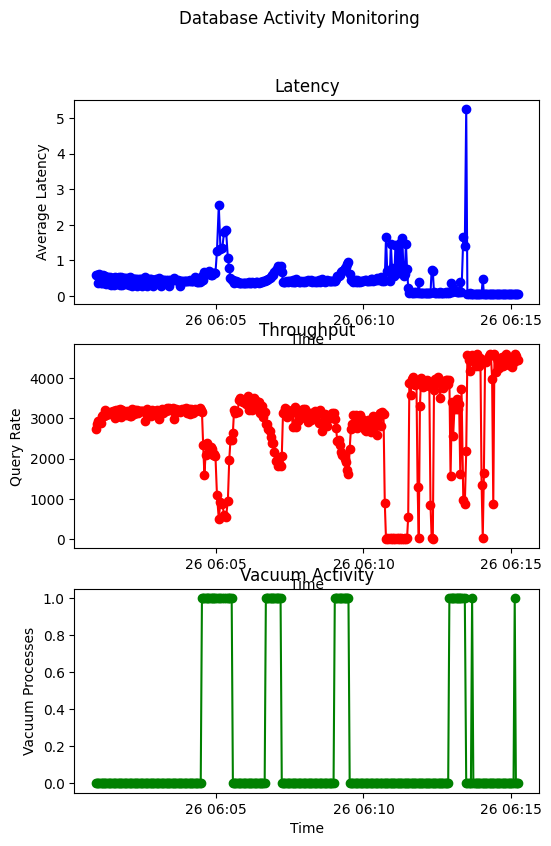

Total queries: 7985, Total latency: 4680.01162799986, Avg latency per query: 0.586100391734485, Transactions per second: 2743.1972315866535983
Vacuum processes: 0
[(Decimal('7985'), Decimal('4680.01162799986'), Decimal('0.586100391734485'), Decimal('2743.1972315866535983'))]
Total queries: 7927, Total latency: 4613.51957099998, Avg latency per query: 0.582000702787938, Transactions per second: 2854.0187586836590054
Vacuum processes: 0
[(Decimal('7927'), Decimal('4613.51957099998'), Decimal('0.582000702787938'), Decimal('2854.0187586836590054'))]
Total queries: 7182, Total latency: 2674.18453499998, Avg latency per query: 0.372345382205511, Transactions per second: 2947.5002677866784643
Vacuum processes: 0
[(Decimal('7182'), Decimal('2674.18453499998'), Decimal('0.372345382205511'), Decimal('2947.5002677866784643'))]
Total queries: 7036, Total latency: 4338.80437000006, Avg latency per query: 0.616657812677666, Transactions per second: 2885.5886256297358349
Vacuum processes: 0
[(Decimal

KeyboardInterrupt: 

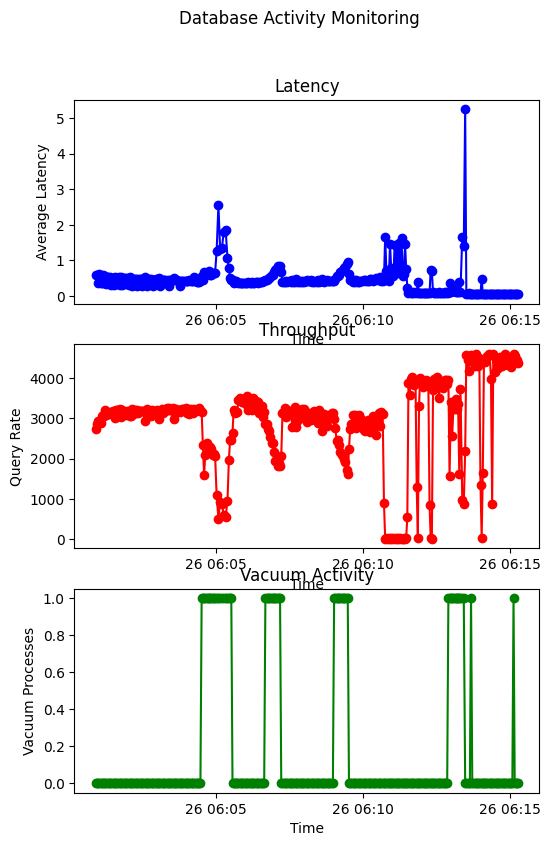

In [83]:
def poll_activity(conn):    
    # in a loop
    while True:
        # create a new cursor
        cur = conn.cursor()
        # call update_stats_snapshot();
        cur.execute("CALL update_stats_snapshot();")

        # select total_queries, total_latency, avg_latency_per_query from compare_latest_snapshots();
        cur.execute("SELECT total_queries, total_latency, avg_latency_per_query, transactions_per_second FROM compare_latest_snapshots();")
        # check success and skip fetch if no results returned
        if cur.rowcount == 0:
            print("No data returned")
            continue

        # fetch the results
        res = cur.fetchall()
        total_queries, total_latency, avg_latency_per_query, transactions_per_second = res[0]

        print(f"Total queries: {total_queries}, Total latency: {total_latency}, Avg latency per query: {avg_latency_per_query}, Transactions per second: {transactions_per_second}")


        # select vacuum_processes from get_vacuum_processes();
        cur.execute("SELECT active_vacuum_ct();")
        vacuum_processes = cur.fetchone()[0]
        print(f"Vacuum processes: {vacuum_processes}")

         # get the current timestamp
        current_time = datetime.datetime.now()

        # update the chart
        update_chart(ax1, ax2, ax3, timestamps, avg_latencies_list, total_queries_list, vacuum_processes_list, current_time, avg_latency_per_query, transactions_per_second, vacuum_processes)
        
        # print the results
        print(res)
        # CALL drop_old_activity_tables();
        cur.execute("CALL drop_old_activity_tables();")
        conn.commit()
        # sleep for 10 second
        time.sleep(2)
        # clear the output
        # clear_output(wait=True)
        cur.close()    

fig, ax1, ax2, ax3, timestamps, avg_latencies_list, total_queries_list, vacuum_processes_list = setup_chart()
hfig = display(fig, display_id=True)

poll_activity(conn)    

In [54]:
conn.close()

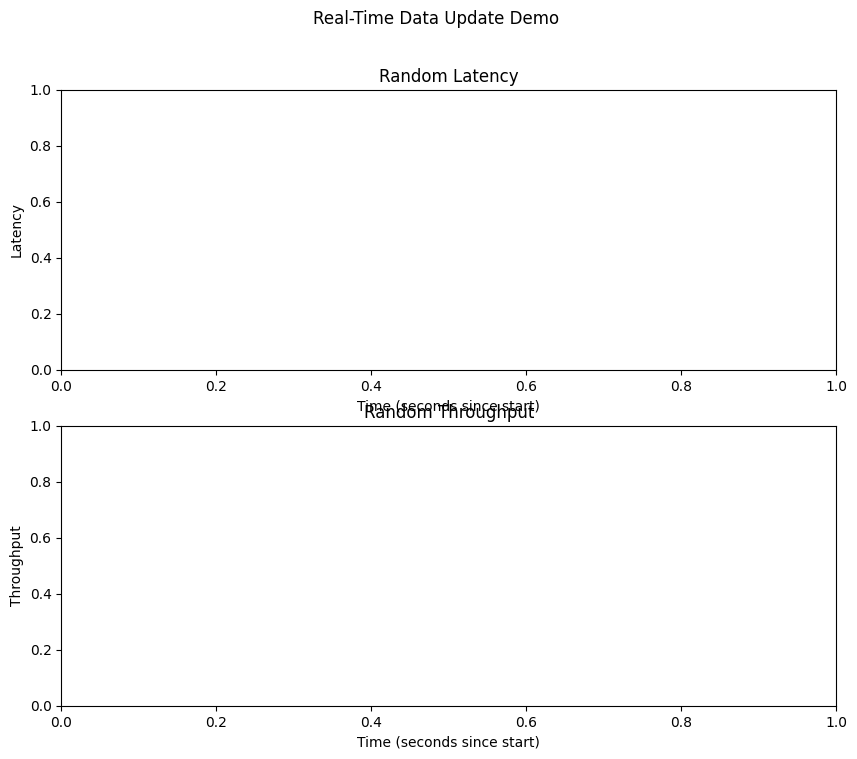

[0.6771713495148669] [0.37414600638061546]
Number of points: 1
[0.6771713495148669, 0.0725666624894834] [0.37414600638061546, 0.4102862272913611]
Number of points: 2
[0.6771713495148669, 0.0725666624894834, 0.9442440808960283] [0.37414600638061546, 0.4102862272913611, 0.9083630142528817]
Number of points: 3
[0.6771713495148669, 0.0725666624894834, 0.9442440808960283, 0.18184829998800156] [0.37414600638061546, 0.4102862272913611, 0.9083630142528817, 0.24259607955457185]
Number of points: 4
[0.6771713495148669, 0.0725666624894834, 0.9442440808960283, 0.18184829998800156, 0.2308597088458706] [0.37414600638061546, 0.4102862272913611, 0.9083630142528817, 0.24259607955457185, 0.218831271568671]
Number of points: 5
[0.6771713495148669, 0.0725666624894834, 0.9442440808960283, 0.18184829998800156, 0.2308597088458706, 0.9778604706290204] [0.37414600638061546, 0.4102862272913611, 0.9083630142528817, 0.24259607955457185, 0.218831271568671, 0.3794590350861461]
Number of points: 6
[0.677171349514866

KeyboardInterrupt: 

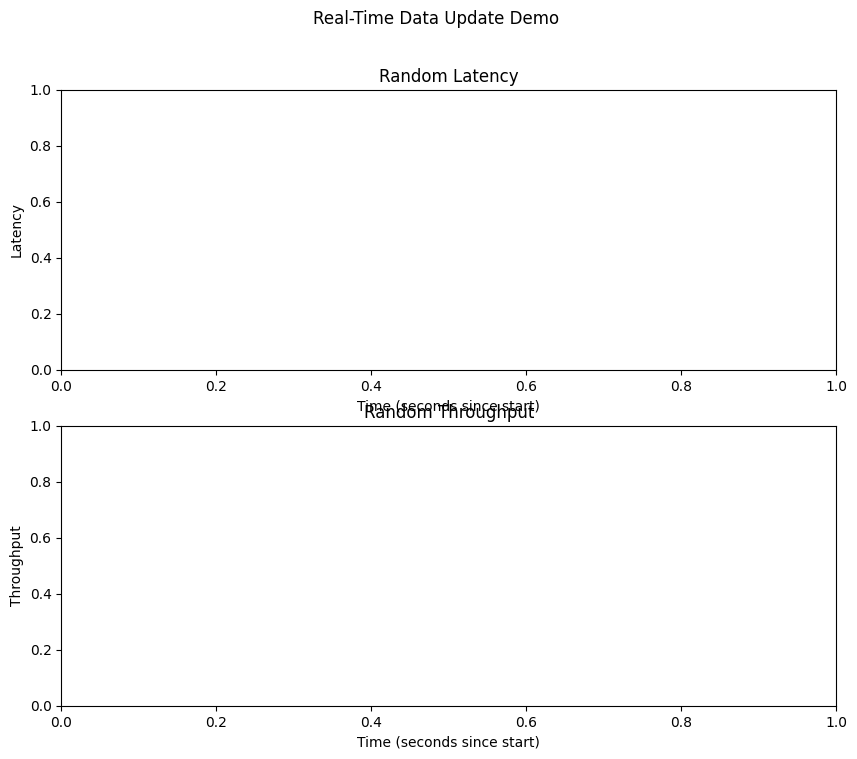

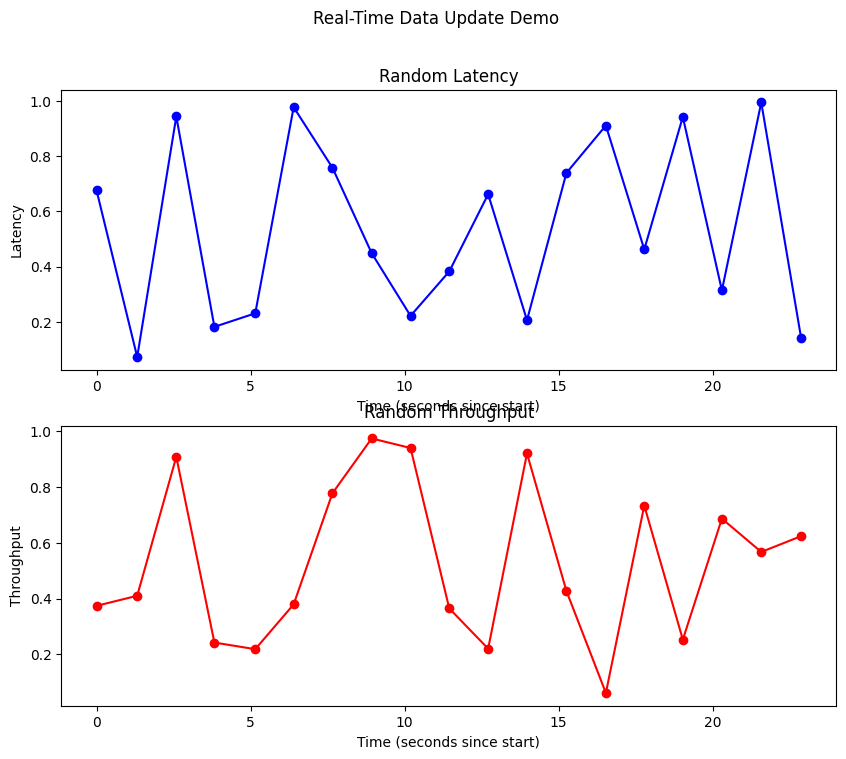

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import time
import datetime
%matplotlib inline

def setup_chart():
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
    fig.suptitle('Real-Time Data Update Demo')

    ax1.set_title('Random Latency')
    ax1.set_xlabel('Time (seconds since start)')
    ax1.set_ylabel('Latency')

    ax2.set_title('Random Throughput')
    ax2.set_xlabel('Time (seconds since start)')
    ax2.set_ylabel('Throughput')

    # Initialize lists to store data
    elapsed_seconds = []
    latencies = []
    throughputs = []

    # Record the start time
    start_time = datetime.datetime.now()

    return fig, ax1, ax2, elapsed_seconds, latencies, throughputs, start_time

fig, ax1, ax2, elapsed_seconds, latencies, throughputs, start_time = setup_chart()
hfig = display(fig, display_id=True)
# plt.ion()  # Turn on interactive mode
# plt.show()

def update_chart(ax1, ax2, elapsed_seconds, latencies, throughputs, elapsed_time, latency, throughput):
    global hfig
    global fig
    # Append new data
    elapsed_seconds.append(elapsed_time)
    latencies.append(latency)
    throughputs.append(throughput)
    
    # Clear the previous lines
    ax1.cla()
    ax2.cla()
    
    # Redraw the subplots with new data
    ax1.plot(elapsed_seconds, latencies, 'bo-')
    ax1.set_title('Random Latency')
    ax1.set_xlabel('Time (seconds since start)')
    ax1.set_ylabel('Latency')
    
    ax2.plot(elapsed_seconds, throughputs, 'ro-')
    ax2.set_title('Random Throughput')
    ax2.set_xlabel('Time (seconds since start)')
    ax2.set_ylabel('Throughput')
    
    # Rescale the axes
    ax1.relim()
    ax1.autoscale_view()
    
    ax2.relim()
    ax2.autoscale_view()
    
    print(f"{latencies} {throughputs}")
    # Print the number of points
    print(f"Number of points: {len(elapsed_seconds)}")
    
    # plt.draw()
    fig.canvas.draw()
    hfig.update(fig)

def poll_activity(ax1, ax2, elapsed_seconds, latencies, throughputs, start_time):
    # In a loop
    while True:
        # Calculate elapsed time
        current_time = datetime.datetime.now()
        elapsed_time = (current_time - start_time).total_seconds()

        # Generate random data
        latency = np.random.random()
        throughput = np.random.random()

        # Update the chart
        update_chart(ax1, ax2, elapsed_seconds, latencies, throughputs, elapsed_time, latency, throughput)

        # Sleep for 1 second
        time.sleep(1)
        # Clear the output
        # clear_output(wait=True)


# Setup the chart
fig, ax1, ax2, elapsed_seconds, latencies, throughputs, start_time = setup_chart()

# Start polling activity
poll_activity(ax1, ax2, elapsed_seconds, latencies, throughputs, start_time)

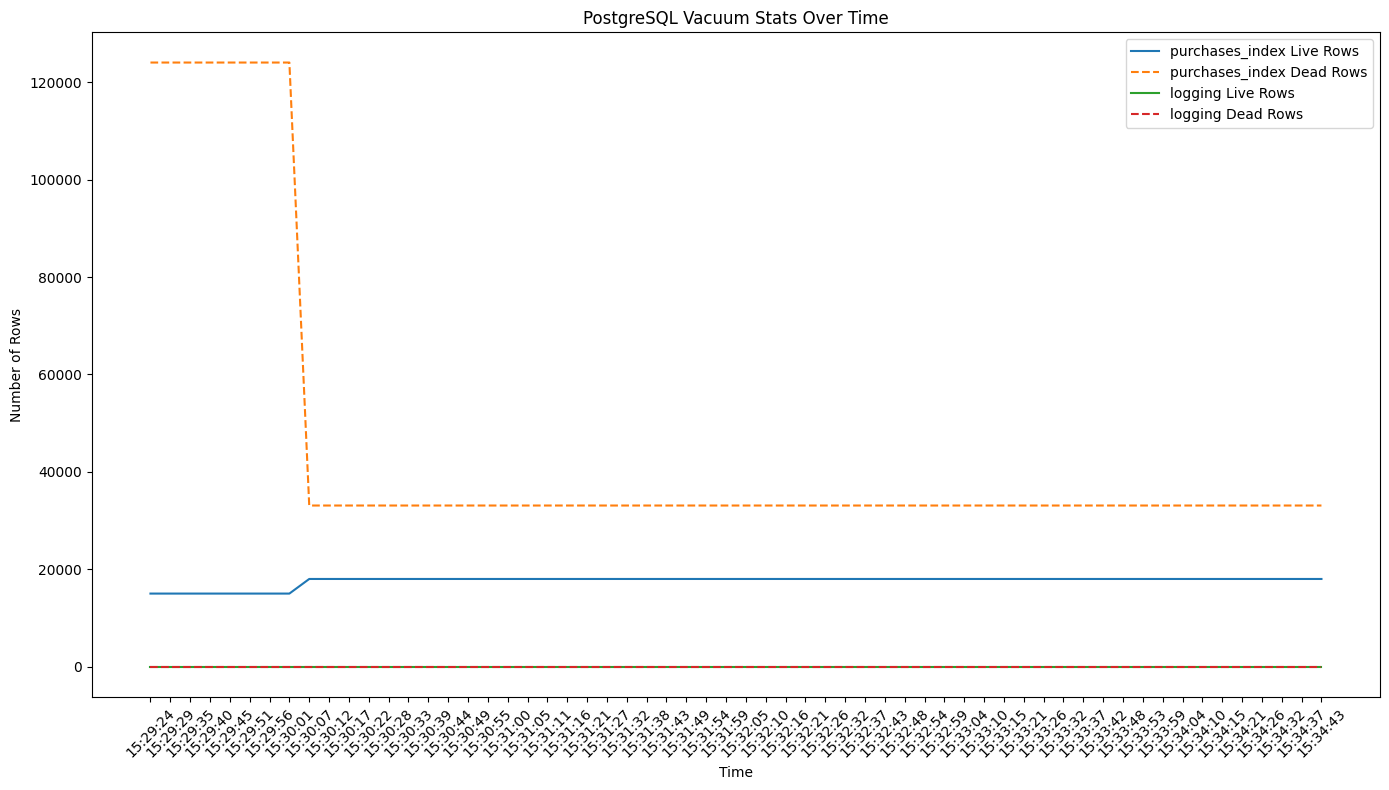

In [2]:


# Function to fetch vacuum stats
def fetch_vacuum_stats(conn):
    query = """
    SELECT
        relname AS table_name,
        n_tup_ins AS rows_inserted,
        n_tup_upd AS rows_updated,
        n_tup_del AS rows_deleted,
        n_live_tup AS live_rows,
        n_dead_tup AS dead_rows,
        last_vacuum,
        last_autovacuum,
        last_analyze,
        last_autoanalyze
    FROM
        pg_stat_all_tables
    WHERE
        schemaname = 'public'
    """
    return pd.read_sql(query, conn)

# Function to plot vacuum stats
def plot_vacuum_stats(df):
    plt.figure(figsize=(10, 6))
    plt.bar(df['table_name'], df['dead_rows'], label='Dead Rows', color='red')
    plt.bar(df['table_name'], df['live_rows'], bottom=df['dead_rows'], label='Live Rows', color='green')
    plt.xlabel('Table Name')
    plt.ylabel('Number of Rows')
    plt.title('PostgreSQL Vacuum Stats')
    plt.xticks(rotation=90)
    plt.legend()
    plt.tight_layout()
    plt.show()


# Initialize a dictionary to store data over time
data = {'time': []}

# Loop to fetch and plot data every 5 seconds for 300 seconds
total_time = 300  # total duration in seconds
interval = 5      # interval in seconds
iterations = total_time // interval

for i in range(iterations):
    # Fetch vacuum stats
    df = fetch_vacuum_stats(conn)
    
    # Record the current time
    current_time = time.strftime("%H:%M:%S")
    data['time'].append(current_time)
    
    # Update the data dictionary with the latest stats
    for _, row in df.iterrows():
        table_name = row['table_name']
        if table_name not in data:
            data[table_name] = {'live_rows': [], 'dead_rows': []}
        data[table_name]['live_rows'].append(row['live_rows'])
        data[table_name]['dead_rows'].append(row['dead_rows'])
    
    # Clear the current output and plot new data
    clear_output(wait=True)
    
    # Create a new figure for the plot
    plt.figure(figsize=(14, 8))
    
    # Plot live and dead rows for each table
    for table_name, stats in data.items():
        if table_name != 'time':
            plt.plot(data['time'], stats['live_rows'], label=f'{table_name} Live Rows')
            plt.plot(data['time'], stats['dead_rows'], label=f'{table_name} Dead Rows', linestyle='--')
    
    # Configure the plot
    plt.xlabel('Time')
    plt.ylabel('Number of Rows')
    plt.title('PostgreSQL Vacuum Stats Over Time')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Wait for the next interval
    time.sleep(interval)

# Close the database connection
conn.close()